In [1]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("films.sqlite3")
conn.row_factory = sqlite3.Row
c = conn.cursor()

#ვქმნით ცვლადს სადაც ვაკეთებთ ინსტრუქციას
# ცხრილების სია
menu = int(input("""მოგესალმებით, არიჩიეთ მოქმედება:
         1. ფილმის ძებნა ჟანრის მიხედვით
         2.ფილმის ძებნა რეიტინგის მიხედვით
         3.ყველა ფილმის ნახვა
         4.ახალი ფილმის დამატება
         5.ფილმის განახლება
         6.ფილმის წაშლა
         მოქმედება: """))

#ვწერთ ლოგიკას თითოეულ მოქმედებაზე
#1 ჟანრის მიხედვით ეძებს ფილმს, რაოდენობა არჩევითია.
if menu == 1:
    def nn(genre, amount):
        genre = str(input("ფილმის ჟანრი: "))
        amount = int(input("მიუთითეთ რაოდენობა: "))
        c.execute("SELECT * FROM NetflixOriginals WHERE Genre=?", (genre,))
        for i in c.fetchmany(amount):
            print(tuple(i))
#2 რეიტინგის მიხედვით ეძებს ყველა ფილმს, ინპუტში რა ციფრის იქნება შეყვანილი მის ზემოთ რაც არის ყველა ფილმს დაპრინტავს

elif menu == 2:
    score = float(input("ფილმის რეიტინგი: "))
    c.execute('SELECT Title, "IMDB Score" FROM NetflixOriginals WHERE "IMDB Score">?', (score,))
    for i in c.fetchall():
        print(tuple(i))
#3 ყველა ფილმის ნახვა დეტალებით ან მხოლოდ სახელები
elif menu == 3:
    question = str(input("გსურთ ყველა ფილმის დეტალის ნახვა? YES/NO: ")).strip().upper()
    if  question == "YES":
        c.execute("SELECT * FROM NetflixOriginals")
        for i in c.fetchall():
            print(tuple(i))
    elif question == "NO":
        c.execute("SELECT Title FROM NetflixOriginals")
        for i in c.fetchall():
            print(tuple(i))
    else:
        print("მსგავსი ოპერაცია არ არსებეობს")
#4 ვქმნით ახალ ფილმს თავისი მონაცემებით
elif menu == 4:
    filmName = str(input("ფილმის სახელი: "))
    filmGenre = str(input("ფილმის ჟანრი: "))
    filmPremiere = int(input("ფილმის წლოვანება: "))
    filmRuntime = int(input("ფილმის ხანგრძლივობა წუთებში: "))
    filmImdb = float(input("ფილმის შეფასება: "))
    filmLng = str(input("ფილმის ენა: "))
#ვუთითებთ თუ სად რა უნდა ჩასვას მონაცემთა ბაზაში
    c.execute(f"""INSERT INTO NetflixOriginals (Title, Genre, Premiere, Runtime, "IMDB Score", Language)
              VALUES ('{filmName}', '{filmGenre}', '{filmPremiere}', '{filmRuntime}', '{filmImdb}', '{filmLng}') """)
#ფილმს ვარქმევთ ახალ სახელს
elif menu == 5:
     old = str(input("შეიყვანეთ ძველი ფილმის სახელი: "))
     new = str(input("შეიყვანეთ ფილმის ახალი სახელი: "))
     c.execute("UPDATE NetflixOriginals SET Title=? WHERE Title=?", (new, old))
#ვშლით ფილმს სათაურის მიხედვით თავისი დეტალებით
elif menu == 6:
    delt = str(input("შეიყვანეთ ფილმის სახელი: "))
    c.execute("DELETE FROM NetflixOriginals WHERE Title=?", (delt,))
else:
    print("მსგავსი ოპერაცია არ არსებობს!")

მოგესალმებით, არიჩიეთ მოქმედება:
         1. ფილმის ძებნა ჟანრის მიხედვით
         2.ფილმის ძებნა რეიტინგის მიხედვით
         3.ყველა ფილმის ნახვა
         4.ახალი ფილმის დამატება
         5.ფილმის განახლება
         6.ფილმის წაშლა
         მოქმედება:  1


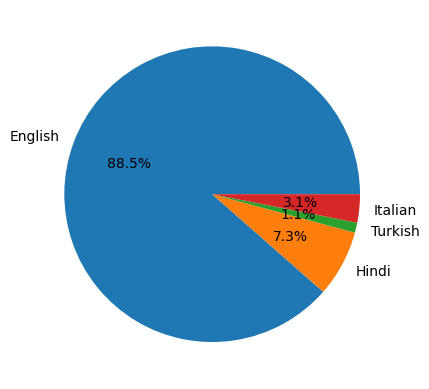

In [2]:
def count_lang(lang):
    return c.execute('SELECT count(*) FROM NetflixOriginals WHERE Language=?', (lang,)).fetchone()[0]
english = count_lang("English")
hindi = count_lang("Hindi")
turkish = count_lang("Turkish")
italian = count_lang("Italian")

#აქ ვუთითებთ label-ებზე სახელებს, num-ზე ციფრებს, რომლებიც უკვე ცვლადებშია
labels = 'English', 'Hindi', 'Turkish', 'Italian'
num = [english, hindi, turkish, italian]

fig, ax = plt.subplots()
ax.pie(num, labels=labels, autopct='%1.1f%%')
plt.show()

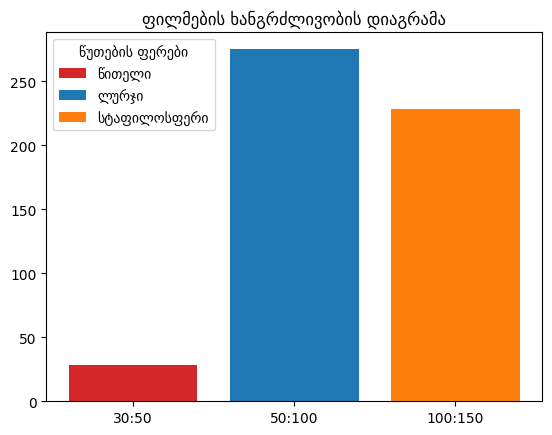

In [5]:
#აქ ვადგენთ რაოდენობას თუ რამდენი ფილმია ხანგრძლივობით ორი ციფრის შუალედში(წუთებში)

def count_time(one, two):
    return c.execute('SELECT count(*) FROM NetflixOriginals WHERE Runtime>? AND Runtime<?', (one,two)).fetchone()[0]
first = count_time(30, 50)
second = count_time(50, 100)
third = count_time(100, 150)

y, x = plt.subplots()

runtime = ['30:50', '50:100', '100:150',]
counts = [first, second, third,]
bar_labels = ['წითელი', 'ლურჯი', 'სტაფილოსფერი']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

x.bar(runtime, counts, label=bar_labels, color=bar_colors)


x.set_title('ფილმების ხანგრძლივობის დიაგრამა')
x.legend(title='წუთების ფერები')
plt.show()


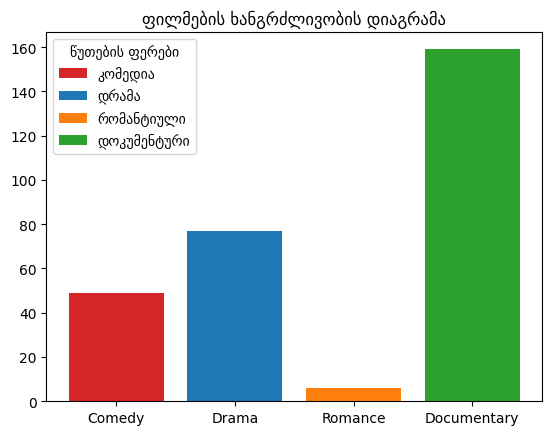

In [6]:

#აქ ვადგენთ რაოდენობას თუ რამდენი ფილმია სხვადასხვა ჟანრებით
def count_com(com):
    return c.execute('SELECT count(*) FROM NetflixOriginals WHERE Genre=?', (com,)).fetchone()[0]
comedy = count_com("Comedy")
drama = count_com("Drama")
romance = count_com("Romance")
documentary = count_com("Documentary")

n, z = plt.subplots()

genr = ['Comedy', 'Drama', 'Romance', 'Documentary']
counts = [comedy, drama, romance, documentary]
bar_labels = ['კომედია', 'დრამა', 'რომანტიული', "დოკუმენტური"]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']

z.bar(genr, counts, label=bar_labels, color=bar_colors)


z.set_title('ფილმების ხანგრძლივობის დიაგრამა')
z.legend(title='წუთების ფერები')
plt.show()
conn.commit()
conn.close()
